# Our first ubermag simulation

The main goal of this tutorial is to have a quick look at how a simple ubermag simulation inside Jupyter looks like and to make ourselves comfortable with Jupyter. We are going to try to guess what the meaning of Python commands in code cells is, and eventually try to identify the skeleton of ubermag simulation. There are probably going to be many parts you do not understand, but please do not worry - we are going to go into all the details in the next sessions.

## Simple Ubermag simulation

Before we specify and run the simulation, we have to import Ubermag modules we intend to use. For defining micromagnetic models, we need to import `micromagneticmodel` and for defining finite-diference fields, we are going to import `discretisedfield`.

In [2]:
import micromagneticmodel as mm  # mm is just a shorter name we want to use later
import discretisedfield as df  # df is just a shorter name we want to use later
import oommfc as mc
import random
import numpy as np
import matplotlib.pyplot as plt

### The main object in Ubermag: System object

The main object in ubermag is `mm.System`. In order to define the micromagnetic system we want to simulate, we have to specify:

1. Energy equation,
2. Dynamics equation (optional),
3. Initial magentisation state configuration.

In [3]:
p1 = (0, 0, 0)
p2 = (100e-9, 100e-9, 84e-9)
region = df.Region(p1=p1, p2=p2)
subregions={}
for i in range(21):
    subregions['r'+str(i)]= df.Region(p1=(0,0,i*4e-9), p2=(100e-9,100e-9,(1+i)*4e-9))
mesh = df.Mesh(region, n=(20, 20, 21), subregions=subregions)

mesh.k3d_subregions()


Output()

In [4]:
system = mm.System(name='Magnetization_Reversal')

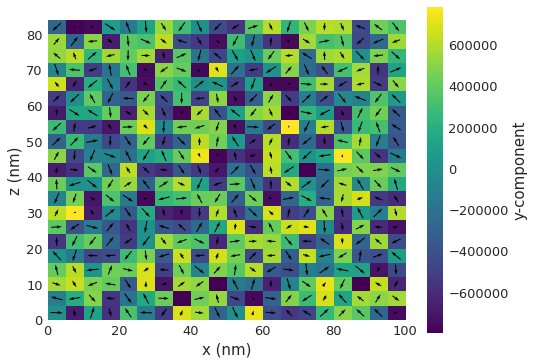

In [5]:
def m_random(point):
    return [2*random.random()-1 for i in range(3)]

system.m = df.Field(mesh, dim=3, value=m_random, norm=8e5)

system.m.plane('y').mpl()

In [6]:
A1 = 5e-12
A2 = -8e-12

Adict = {}
for i in range(21):
    Adict['r'+str(i)]=A1
    if i !=20:
        Adict['r'+str(i)+':'+'r'+str(i+1)]=A2
    else:
        break
        
system.energy = mm.Exchange(A=Adict) + mm.UniaxialAnisotropy(K=6e5, u=(0, 0, 1)) + mm.Demag()+mm.Zeeman(H=(0,0,0))

In [7]:
B1_array = np.arange(12, -12, 0.4)
B2_array = np.arange(-12, 12, 0.4)
B_array = np.append([B1_array], [B2_array])

Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:42]... (25.9 s)


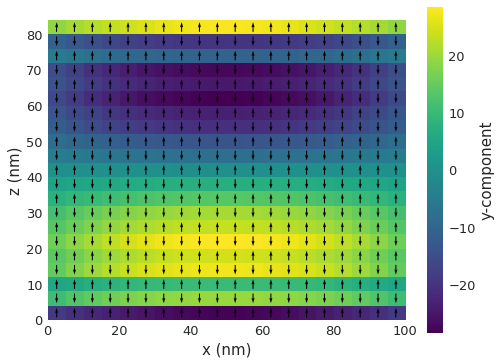

In [8]:
md = mc.MinDriver()
md.drive(system)

system.m.plane('y').mpl()

In [12]:
mz=[]

for B in B_array:
    system.energy.zeeman.H = (0,0,B/mm.consts.mu0)
    md.drive(system)
    mz.append(system.m.orientation.z.average)


Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (5.9 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.6 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:17]... (2.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:18]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:18]... (2.9 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:18]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:18]... (2.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:18]... (2.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:18]... (2.8 s)
Running OOMMF (ExeOOMMFR

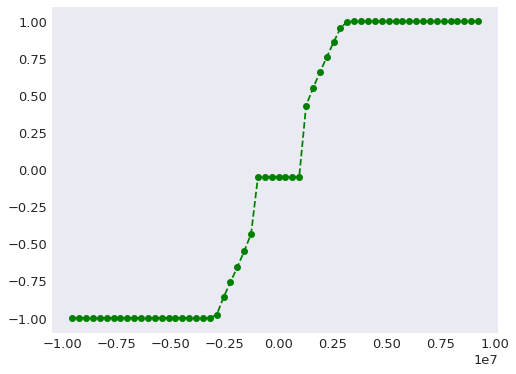

In [15]:
H=B_array/mm.consts.mu0
plt.plot(H,mz,'go',linestyle='--')

Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:46]... (13.0 s)


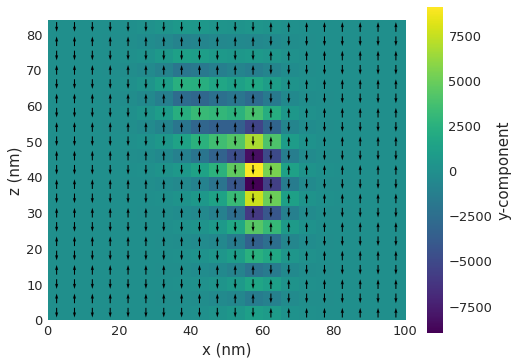

In [8]:
system.energy = mm.Exchange(A=Adict) + mm.UniaxialAnisotropy(K=6e5, u=(0, 0, 1)) +mm.Zeeman(H=(0,0,0))

md = mc.MinDriver()
md.drive(system)

system.m.plane('y').mpl()

In [9]:
mz=[]

for B in B_array:
    system.energy.zeeman.H = (0,0,B/mm.consts.mu0)
    md.drive(system)
    mz.append(system.m.orientation.z.average)

Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:46]... (2.7 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.0 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.0 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.2 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.1 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.0 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (1.9 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (1.9 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (1.8 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.1 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.0 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.1 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:47]... (2.3 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:48]... (2.2 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:48]... (2.2 s)
Running OOMMF (ExeOOMMFRunner) [2020/10/24 16:48]... (2.2 s)
Running OOMMF (ExeOOMMFR

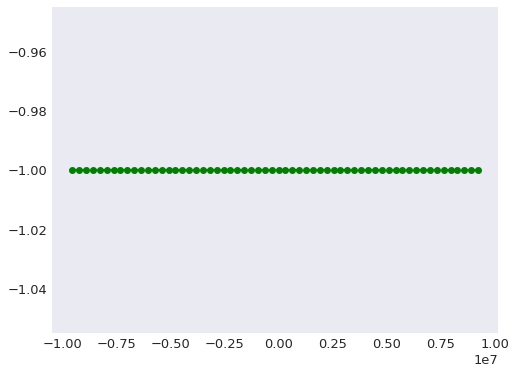

In [10]:
H=B_array/mm.consts.mu0
plt.plot(H,mz,'go',linestyle='--')